In [58]:
import pandas as pd 
import numpy as np 
import seaborn as sns
import matplotlib.pyplot as plt

In [59]:
empdf = pd.read_csv("D:\\Project\\Kaggle_EDA\\HR_Analysis\\HR.csv")
empdf.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion,YearsWithCurrManager
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,3,3,0,0,2,3,0,0,0,0.0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,3,1,0,0,2,3,0,0,0,0.0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,3,4,0,0,3,3,0,0,0,0.0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,3,4,0,0,2,3,0,0,0,0.0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,3,4,0,0,0,3,0,0,0,0.0


In [60]:
empdf.isnull().sum()

EmpID                        0
Age                          0
AgeGroup                     0
Attrition                    0
BusinessTravel               0
DailyRate                    0
Department                   0
DistanceFromHome             0
Education                    0
EducationField               0
PerformanceRating            0
RelationshipSatisfaction     0
StockOptionLevel             0
TotalWorkingYears            0
TrainingTimesLastYear        0
WorkLifeBalance              0
YearsAtCompany               0
YearsInCurrentRole           0
YearsSinceLastPromotion      0
YearsWithCurrManager        40
dtype: int64

In [61]:
empdf.drop(columns = ['YearsWithCurrManager'] , inplace = True)

In [63]:
empdf['Age'] = pd.to_numeric(empdf['Age'])
empdf['DailyRate'] = pd.to_numeric(empdf['DailyRate'])
empdf['DistanceFromHome'] = pd.to_numeric(empdf['DistanceFromHome'])
empdf['Education'] = pd.to_numeric(empdf['Education'])
empdf['RelationshipSatisfaction'] = pd.to_numeric(empdf['RelationshipSatisfaction'])

In [64]:
Empdata = empdf.copy()

In [65]:
Empdata.shape

(1000, 19)

In [66]:
Empdata.columns

Index(['EmpID', 'Age', 'AgeGroup', 'Attrition', 'BusinessTravel', 'DailyRate',
       'Department', 'DistanceFromHome', 'Education', 'EducationField',
       'PerformanceRating', 'RelationshipSatisfaction', 'StockOptionLevel',
       'TotalWorkingYears', 'TrainingTimesLastYear', 'WorkLifeBalance',
       'YearsAtCompany', 'YearsInCurrentRole', 'YearsSinceLastPromotion'],
      dtype='object')

Employee Insights

In [67]:
Empdata['EmpID'].count()


np.int64(1000)

In [68]:
Empdata['AgeGroup'].unique()

array(['18-25', '26-35', '36-45'], dtype=object)

In [69]:
Empdata['Department'].unique()

array(['Research & Development', 'Sales', 'Human Resources'], dtype=object)

C:\Users\Vishwajeet Barade\AppData\Local\Temp\ipykernel_13892\671506415.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(Emp_no , x = 'AgeGroup' , y = 'EmpID' , palette = 'tab10')


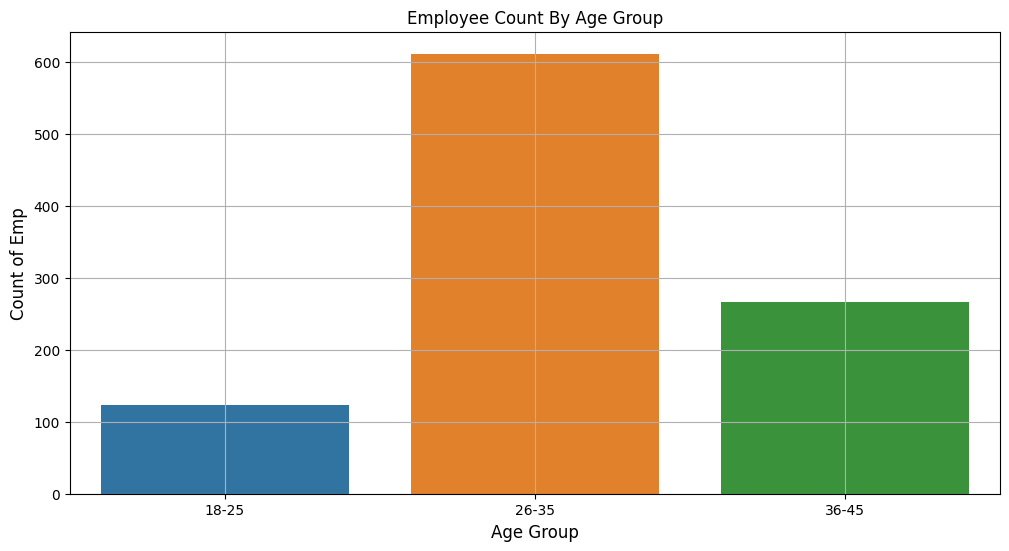

In [70]:
## Which age group of employee are max 

Emp_no = Empdata.groupby(['AgeGroup'])['EmpID'].count().reset_index()
## plot visual Bar chart 
plt.figure(figsize = (12,6))
sns.barplot(Emp_no , x = 'AgeGroup' , y = 'EmpID' , palette = 'tab10')
plt.title("Employee Count By Age Group" , fontsize = 12)
plt.xlabel("Age Group" , fontsize =12)
plt.ylabel("Count of Emp" , fontsize =12)
plt.grid()
plt.show()

The age group 26-35 has the highest number of employees (~600), indicating a dominant mid-career workforce. The 36-45 age group follows closely with around 480 employees, suggesting a strong presence of experienced professionals in leadership roles.

C:\Users\Vishwajeet Barade\AppData\Local\Temp\ipykernel_13892\2913333944.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(Emp_no , x = 'Department' , y = 'EmpID' , palette = 'deep')


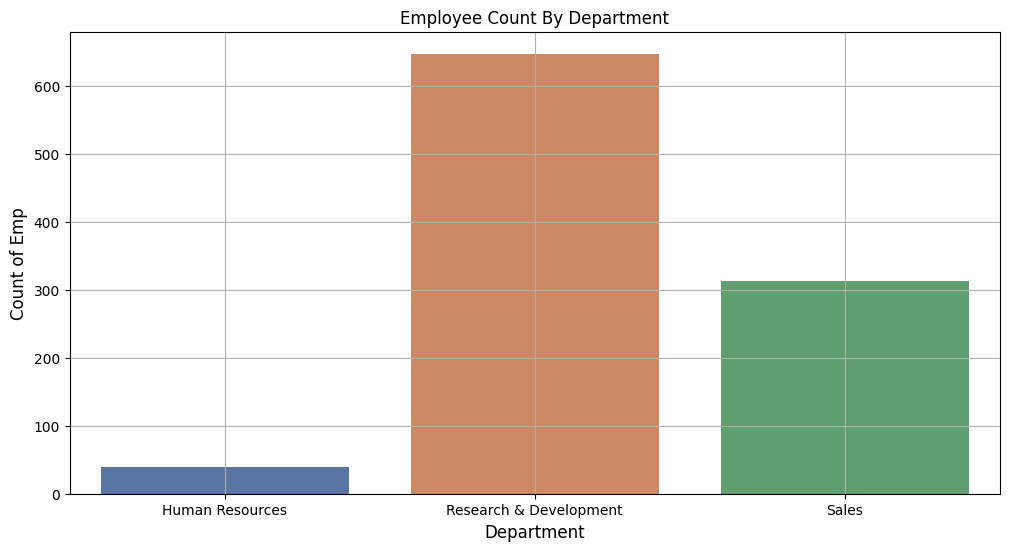

In [71]:
## Which Department has maximum workforce

Emp_no = Empdata.groupby(['Department'])['EmpID'].count().reset_index()
## plot visual Bar chart 
plt.figure(figsize = (12,6))
sns.barplot(Emp_no , x = 'Department' , y = 'EmpID' , palette = 'deep')
plt.title("Employee Count By Department" , fontsize = 12)
plt.xlabel("Department" , fontsize =12)
plt.ylabel("Count of Emp" , fontsize =12)
plt.grid()
plt.show()

The Research and Development department has approximately 950 employees, indicating it is one of the largest departments in the organization, likely contributing significantly to innovation and product development.

In [72]:
Empdata['BusinessTravel'].value_counts()

BusinessTravel
Travel_Rarely        691
Travel_Frequently    196
Non-Travel           105
TravelRarely           8
Name: count, dtype: int64

In [73]:
Empdata['BusinessTravel'] = Empdata['BusinessTravel'].replace('TravelRarely' , 'Travel_Rarely')

<Axes: xlabel='BusinessTravel'>

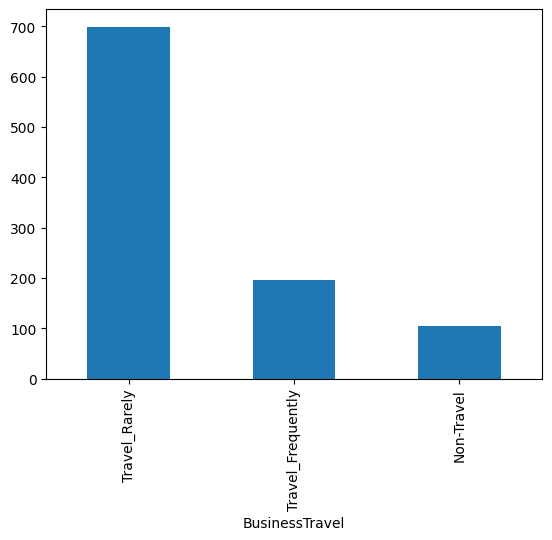

In [74]:
Empdata['BusinessTravel'].value_counts().plot(kind = 'bar')

Most of the employees travel rarely, indicating that business travel is infrequent for the majority of the workforce.

In [17]:
Empdata['MaritalStatus'].value_counts()

MaritalStatus
Married     679
Single      473
Divorced    328
Name: count, dtype: int64

In [18]:
## Monthly income Average according to his/her Department

Emp_salary = Empdata.groupby(['Department']).agg({'MonthlyIncome' : 'mean' }).reset_index()
Emp_salary

,Department,MonthlyIncome
0,Human Resources,6654.507937
1,Research & Development,6280.365047
2,Sales,6966.737778


C:\Users\Vishwajeet Barade\AppData\Local\Temp\ipykernel_13892\1527136269.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(Emp_salary, x = 'Department' , y = 'MonthlyIncome' , palette = 'deep')


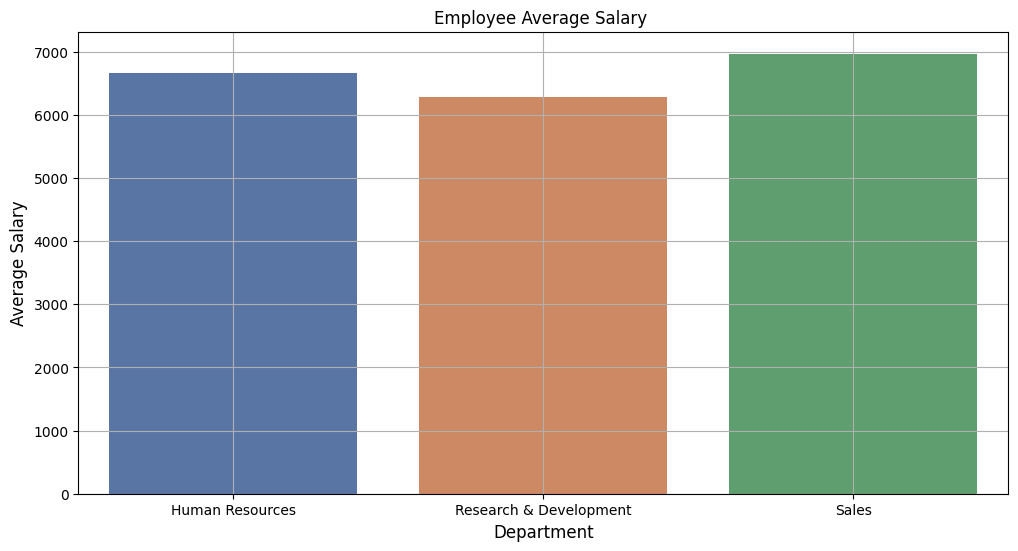

In [19]:
plt.figure(figsize = (12,6))
sns.barplot(Emp_salary, x = 'Department' , y = 'MonthlyIncome' , palette = 'deep')
plt.title("Employee Average Salary " , fontsize = 12)
plt.xlabel("Department" , fontsize =12)
plt.ylabel("Average Salary" , fontsize =12)
plt.grid()
plt.show()

In [20]:
Empdata[Empdata['MonthlyIncome']==Empdata['MonthlyIncome'].max()]

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,...,PerformanceRating,RelationshipSatisfaction,StandardHours,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
1356,RM191,52,46-55,No,Travel_Rarely,699,Research & Development,1,4,Life Sciences,...,3,1,80,1,34,5,3,33,18,11


The maximum salary of 19999 is being received by a 52-year-old employee from the Research and Development department.

Attrition Analysis 

In [75]:
Empdata['Attrition'].value_counts()

Attrition
No     816
Yes    184
Name: count, dtype: int64

In [76]:
Emp_attr = Empdata[Empdata['Attrition'] == 'Yes']
Emp_attr.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,3,3,0,0,2,3,0,0,0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,3,4,0,0,3,3,0,0,0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,3,4,0,0,0,3,0,0,0
6,RM1154,18,18-25,Yes,Travel_Frequently,544,Sales,3,2,Medical,3,3,0,0,2,4,0,0,0
8,RM128,19,18-25,Yes,Travel_Rarely,528,Sales,22,1,Marketing,3,4,0,0,2,2,0,0,0


C:\Users\Vishwajeet Barade\AppData\Local\Temp\ipykernel_13892\3335772845.py:6: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(Emp_no , x = 'AgeGroup' , y = 'EmpID' , palette = 'tab10')


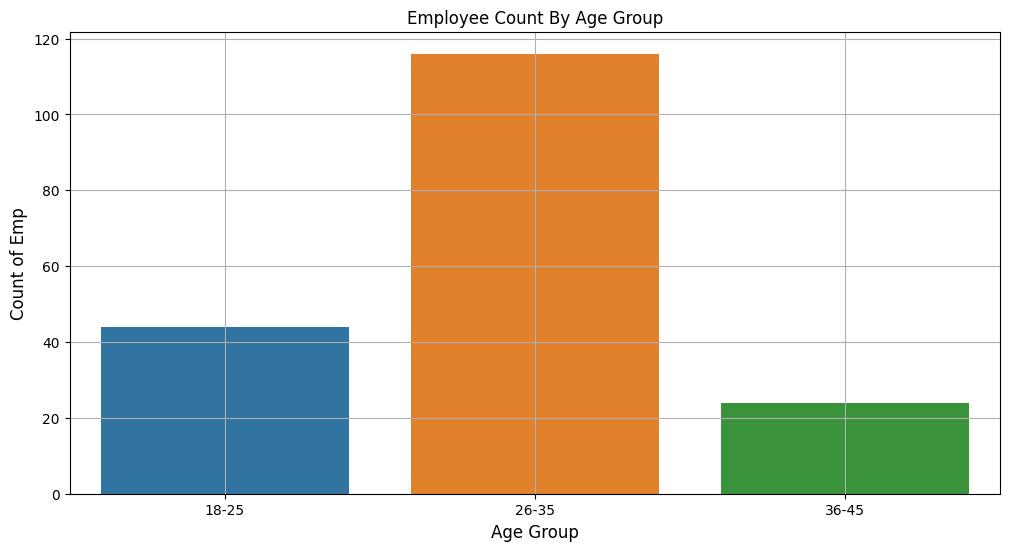

In [77]:
## Which age group of Attrition employee are max 

Emp_no = Emp_attr.groupby(['AgeGroup'])['EmpID'].count().reset_index()
## plot visual Bar chart 
plt.figure(figsize = (12,6))
sns.barplot(Emp_no , x = 'AgeGroup' , y = 'EmpID' , palette = 'tab10')
plt.title("Employee Count By Age Group" , fontsize = 12)
plt.xlabel("Age Group" , fontsize =12)
plt.ylabel("Count of Emp" , fontsize =12)
plt.grid()
plt.show()

The 26-35 age group has the highest number of employees experiencing attrition, indicating that this group may be more likely to leave the company compared to other age groups.

In [24]:
avg_salary = Emp_attr['MonthlyIncome'].mean()
avg_salary

np.float64(4812.584033613445)

The monthly average salary of employees in the 26-35 age group experiencing attrition is around 4500 - 5000, suggesting that employees in this range with moderate salaries may be more likely to leave the organization.

<Axes: ylabel='count'>

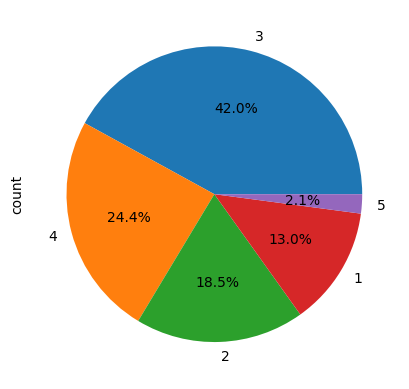

In [25]:
Emp_attr['Education'].value_counts().plot(kind = 'pie', autopct = '%1.1f%%')

In [26]:
Emp_attr['RelationshipSatisfaction'].value_counts()

RelationshipSatisfaction
3    71
4    64
1    57
2    46
Name: count, dtype: int64

In [27]:
Emp_attr['WorkLifeBalance'].value_counts()

WorkLifeBalance
3    128
2     58
4     27
1     25
Name: count, dtype: int64

In [28]:
Emp_attr['PerformanceRating'].value_counts()

PerformanceRating
3    201
4     37
Name: count, dtype: int64

The company is losing top talent due to low salary despite high performance. To improve retention, salary adjustments, performance-based incentives, and career growth opportunities should be prioritized.

In [29]:
Emp_attr['StandardHours'].mean()

np.float64(80.0)

1]Most employees leaving the company are high-skilled and in the 26-35 age group. 
2]They have good to outstanding performance, but their monthly salary of 4500-5000 is too low for their experience and financial needs.
3]Since they are at a stage where they seek better pay and career growth, they leave for higher-paying jobs. 
4]To reduce attrition, the company should offer better salaries, promotions, and career development opportunities.

Regression Model 

In [115]:
Empdata.head()

,EmpID,Age,AgeGroup,Attrition,BusinessTravel,DailyRate,Department,DistanceFromHome,Education,EducationField,PerformanceRating,RelationshipSatisfaction,StockOptionLevel,TotalWorkingYears,TrainingTimesLastYear,WorkLifeBalance,YearsAtCompany,YearsInCurrentRole,YearsSinceLastPromotion
0,RM297,18,18-25,Yes,Travel_Rarely,230,Research & Development,3,3,Life Sciences,3,3,0,0,2,3,0,0,0
1,RM302,18,18-25,No,Travel_Rarely,812,Sales,10,3,Medical,3,1,0,0,2,3,0,0,0
2,RM458,18,18-25,Yes,Travel_Frequently,1306,Sales,5,3,Marketing,3,4,0,0,3,3,0,0,0
3,RM728,18,18-25,No,Non-Travel,287,Research & Development,5,2,Life Sciences,3,4,0,0,2,3,0,0,0
4,RM829,18,18-25,Yes,Non-Travel,247,Research & Development,8,1,Medical,3,4,0,0,0,3,0,0,0


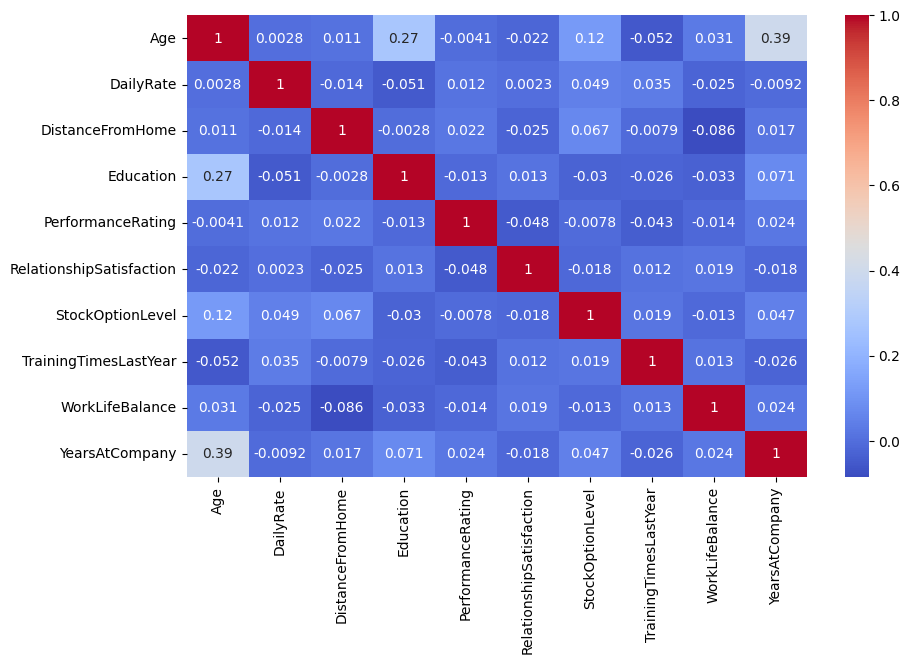

In [173]:
## Independent Variable not be form co-linearity
plt.figure(figsize=(10, 6))
sns.heatmap(X_train.corr(), annot=True, cmap='coolwarm')
plt.show()

In [113]:
emp  = Empdata.drop(columns = ['EmpID' ,'AgeGroup','BusinessTravel','Department','EducationField','YearsInCurrentRole','YearsSinceLastPromotion','TotalWorkingYears'],axis =1)

In [116]:
X = emp.drop(columns = ['Attrition'])
y = emp.Attrition

In [185]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test = train_test_split(X,y,test_size = 0.2,random_state =10)

In [186]:
from sklearn.linear_model import LogisticRegression
lgr = LogisticRegression()

In [187]:
lgr.fit(X_train,y_train)

C:\Users\Vishwajeet Barade\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_logistic.py:465: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. OF ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [120]:
lgr.predict(X_test)

array(['No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'Yes', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'Yes', 'No', 'Yes',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No', 'No',
       'No', 'No', 'No', 'No', 'No', 'Yes',

In [121]:
lgr.score(X_test,y_test)

0.82

In [146]:
lgr.predict([[29,992,1,3,3,4,0,1,2,6]])

C:\Users\Vishwajeet Barade\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\utils\validation.py:2739: UserWarning: X does not have valid feature names, but LogisticRegression was fitted with feature names
  warnings.warn(


array(['No'], dtype=object)

Version 2

In [188]:
model = LogisticRegression(solver='saga', max_iter=500)
model.fit(X_train, y_train)

C:\Users\Vishwajeet Barade\AppData\Local\Programs\Python\Python313\Lib\site-packages\sklearn\linear_model\_sag.py:348: ConvergenceWarning: The max_iter was reached which means the coef_ did not converge
  warnings.warn(


LogisticRegression(max_iter=500, solver='saga')

In [189]:
model.score(X_test,y_test)

0.825

In [192]:
import joblib

joblib.dump(model,"Hr_model.pkl")

['Hr_model.pkl']